In [1]:
import numpy as np
import matplotlib.pyplot as plt

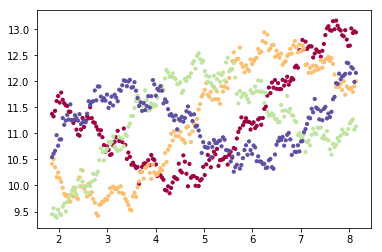

In [6]:
# 生成相关数据
def show_data(X, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap=plt.cm.Spectral)
    plt.show() 
def gen_toy_data(dim, N_class, num_samp_per_class):
    num_examples = num_samp_per_class*N_class
    X = np.zeros((num_examples,dim)) # data matrix (each row = single example)
    labels = np.zeros(num_examples, dtype='uint8') # class labels
    for j in range(N_class):
        ix = range(num_samp_per_class*j,num_samp_per_class*(j+1))
        x = np.linspace(-np.pi, np.pi, num_samp_per_class) + 5 # x axis
        y = np.sin(x + j*np.pi/(0.5*N_class) )
        y += 0.2*np.sin(10*x + j*np.pi/(0.5*N_class) ) 
        y += 0.25*x + 10
        y += np.random.randn(num_samp_per_class)*0.1 # noise
        
        X[ix] = np.c_[x, y]
        labels[ix] = j  
        
    show_data(X, labels) 
    return X,labels
data = gen_toy_data(2,4,200)

In [7]:
# 数据中心化和归一化
def normalize(X):
    # (x-u)/delta
    mean = np.mean(X, axis=0)
    X_norm = X - mean
    std = np.std(X_norm, axis=0)
    X_norm /= std + 10**(-5)
    return X_norm, mean, std

In [8]:
# PCA白话
def PCA_white(X):
    mean = np.mean(X, axis=0)
    X_norm = X - mean # zero-center
    cov = np.dot(X_norm.T, X_norm)/X_norm.shape[0] # covariance matrix
    U,S,V = np.linalg.svd(cov)
    X_norm = np.dot(X_norm, U)
    X_norm /= np.sqrt(S + 10**(-5))
    return X_norm, mean, U, S

In [9]:
# 数据拆分2:1:1拆分训练集，验证集，测试集
def split_data(X, labels):
    num_examples = X.shape[0]
    shuffle_no = list(range(num_examples))
    np.random.shuffle(shuffle_no) # 1
    
    X_train = X[shuffle_no[:num_examples//2]]
    labels_train = labels[shuffle_no[:num_examples//2]]
    
    X_val = X[shuffle_no[num_examples//2:num_examples//2 + num_examples//4]]
    labels_val = labels[shuffle_no[num_examples//2:num_examples//2 + num_examples//4]]
    
    X_test = X[shuffle_no[-num_examples//4 :]]
    labels_test = labels[shuffle_no[-num_examples//4 :]]
    
    return X_train, labels_train, X_val, labels_val, X_test, labels_test

In [10]:
# 对数据进行预处理
def data_preprocess(X_train, X_val, X_test):
    (X_train_pca, mean, U, S) = PCA_white(X_train)
    X_val_pca = np.dot(X_val-mean, U)
    X_val_pca /= np.sqrt(S + 10**(-5))
    X_test_pca = np.dot(X_test-mean, U)
    X_test_pca /= np.sqrt(S + 10**(-5))
    return (X_train_pca, X_val_pca, X_test_pca)

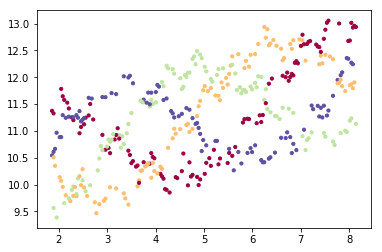

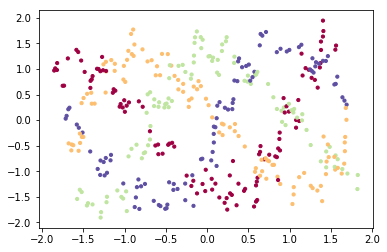

In [18]:
X,labels = data
X_train,labels_train,X_val,labels_val,X_test,labels_test = split_data(X, labels)
X_train_pca, X_val_pca, X_test_pca = data_preprocess(X_train,X_val,X_test)
show_data(X_train,labels_train)
show_data(X_train_pca, labels_train)